In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def pc1(weights, phi): # p(c1|Phi) = y(Phi)
    return sigmoid(np.dot(phi,weights))
def R_func(y):
    R = np.zeros([len(y), len(y)])
    for i in range(0, len(y)):
        R[i,i] = y[i]*(1-y[i])
    return R
def w_new(w_old, phi, t): # The update Rule
    # convert everything to numpy matrices so we can write the code cleaner
    y = np.asmatrix(pc1(w_old, phi))
    t = np.asmatrix(t)
    R = np.asmatrix(R_func(y))
    phi = np.asmatrix(phi)
    w_new = w_old - np.linalg.inv(phi.T * R * phi) * phi.T * (y-t)
    return w_new

In [3]:
# Deplpy w_new function
wNew = np.asmatrix([1.0,1.0]).T # Initialize weights
weights = [wNew]
n = 10 # number of iterations for updating
phi = np.asmatrix([[1,0.3], [1, 0.44], [1, 0.46], [1, 0.6]])
t = np.asmatrix([1,0,1,0]).T
for i in range(0,n):
    wNew = w_new(wNew, phi, t)
    weights.append(wNew)
print wNew

[[  9.78227684]
 [-21.73839298]]


In [129]:
# Schmierballt
weights_plot[:,1].ravel().shape

(101,)

(11, 2, 1)


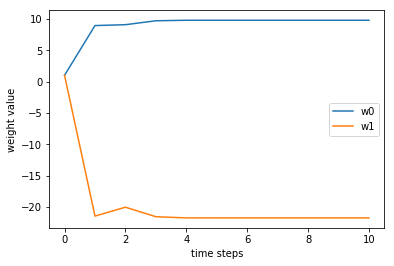

In [141]:
# Le Plot
import matplotlib.pyplot as plt

fig1 = plt.figure(1, figsize=(6,4), dpi=120)
weights_plot  = np.asarray(weights)
print weights_plot.shape
plt.plot(range(0,n+1), weights_plot[:,0].ravel(), label = 'w0')
plt.plot(range(0,n+1), weights_plot[:,1].ravel(), label = 'w1')
plt.legend()
plt.xlabel('time steps')
plt.ylabel('weight value')
plt.show()
fig1.savefig('weightConvergence')